## ***EDA***

*Generación del EDA para el data sets Homicidios de la ciudad de Buenos Aires!* <br>
Proyecto Individual - Data Analytics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
homicidios = pd.read_excel("Data sets entrada/homicidios.xlsx")

In [3]:
homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [4]:
# Verifico si hay campos duplicados
hay_duplicados = homicidios.duplicated().any()
hay_duplicados

# No hay campos duplicados!

False

In [5]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [6]:
# Primer filtros de columnas para generar el dataframe homicidios reduciodo
columnas_hom_reducido = ['ID','N_VICTIMAS','FECHA', 'AAAA', 'MM', 'DD','HH','TIPO_DE_CALLE', 'Calle',
                          'Dirección Normalizada', 'COMUNA', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']

homicidios_reducido = homicidios[columnas_hom_reducido]

In [7]:
homicidios_reducido

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,7,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,11,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",9,AUTO-CARGAS,AUTO,CARGAS


In [8]:
# Verificar y mostrar los campos NaN en todo el DataFrame
nulos_totales = homicidios_reducido[homicidios_reducido.isna().any(axis=1)]

In [9]:
nulos_totales

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,13,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,0,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20,CALLE,NaN,NaN,0,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,3,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,7,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,6,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,9,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,MOTO-CARGAS,MOTO,CARGAS


In [10]:
# Si deseas contar el número total de valores nulos en todo el DataFrame, puedes usar la función sum() después de sum()
suma_de_nulos = homicidios_reducido.isna().sum().sum()
suma_de_nulos

9

Detecte 9 campos nulos todos en la columna "direccion normalizada", y la voy a completar con el campo de "calles".
Directamente lo hacemos en el data frame homicidios reducidos

In [11]:
homicidios_reducido.loc[:, 'Dirección Normalizada'] = homicidios_reducido['Dirección Normalizada'].fillna(homicidios_reducido['Calle'])


In [12]:
homicidios_reducido

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,7,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,11,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",9,AUTO-CARGAS,AUTO,CARGAS


Controlar si quedaron Nulos

In [13]:
# Verificar y mostrar los campos NaN en todo el DataFrame para controlar la modificacion
nulos_totales_2 = homicidios_reducido[homicidios_reducido.isna().any(axis=1)]
nulos_totales_2


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20,CALLE,NaN,NaN,0,PEATON-SD,PEATON,SD


El campo que quedo con nulos se lo ve muy incompleto, por lo que paso a eliminarlo

In [14]:
homicidios_reducido = homicidios_reducido.dropna()
homicidios_reducido

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,7,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,11,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",9,AUTO-CARGAS,AUTO,CARGAS


# Primer data frame revisado y controlado para inicio de analisis!


In [15]:
homicidios_reducido

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,7,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,11,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",9,AUTO-CARGAS,AUTO,CARGAS


# Seguimos limpiando y trabajando el segundo dataframe

In [16]:
# Cargamos la hoja "VICTIMAS" del mismo archivo
hoja = 'VICTIMAS'
victimas = pd.read_excel("Data sets entrada/homicidios.xlsx", hoja)

In [17]:
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [18]:
# Verificar y mostrar los campos NaN en todo el DataFrame victimas
nulos_victimas = homicidios_reducido[homicidios_reducido.isna().any(axis=1)]
nulos_victimas

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO


No hay Nulos

In [19]:
# Acomodo la fecha en la columna Fecha_Fallecimiento

victimas['FECHA_FALLECIMIENTO'] = victimas['FECHA_FALLECIMIENTO'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y').date() if x != 'SD' else 'SD')


In [20]:
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02


In [21]:
# Agrego una columna que me indique la diferencia entre dias del accidente y el fallecimiento

victimas['DIFERENCIA_DIAS'] = (pd.to_datetime(victimas['FECHA_FALLECIMIENTO'], errors='coerce') - pd.to_datetime(victimas['FECHA'], errors='coerce')).dt.days

In [22]:
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIFERENCIA_DIAS
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11.0
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12,0.0
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5.0
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0.0
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3.0


# Segundo dataset terminado

# Sigo analizando los datos de estos data sets

In [23]:
homicidios = homicidios_reducido.copy()

In [24]:
print(homicidios.describe())

       N_VICTIMAS                          FECHA         AAAA          MM  \
count  695.000000                            695   695.000000  695.000000   
mean     1.030216  2018-09-15 04:10:42.302158336  2018.191367    6.686331   
min      1.000000            2016-01-01 00:00:00  2016.000000    1.000000   
25%      1.000000            2017-04-03 00:00:00  2017.000000    4.000000   
50%      1.000000            2018-07-14 00:00:00  2018.000000    7.000000   
75%      1.000000            2020-01-04 12:00:00  2020.000000   10.000000   
max      3.000000            2021-12-30 00:00:00  2021.000000   12.000000   
std      0.179519                            NaN     1.682915    3.570133   

               DD      COMUNA  
count  695.000000  695.000000  
mean    15.933813    7.435971  
min      1.000000    0.000000  
25%      9.000000    4.000000  
50%     16.000000    8.000000  
75%     23.000000   11.000000  
max     31.000000   15.000000  
std      8.645513    4.381139  


In [25]:
print(victimas.describe())

                               FECHA         AAAA          MM          DD  \
count                            717   717.000000  717.000000  717.000000   
mean   2018-09-09 01:36:24.100418304  2018.174338    6.688982   15.960948   
min              2016-01-01 00:00:00  2016.000000    1.000000    1.000000   
25%              2017-04-01 00:00:00  2017.000000    4.000000    9.000000   
50%              2018-07-07 00:00:00  2018.000000    7.000000   16.000000   
75%              2019-12-18 00:00:00  2019.000000   10.000000   23.000000   
max              2021-12-30 00:00:00  2021.000000   12.000000   31.000000   
std                              NaN     1.672655    3.575140    8.683358   

       DIFERENCIA_DIAS  
count       649.000000  
mean          1.272727  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max          27.000000  
std           3.780376  


In [26]:
homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS


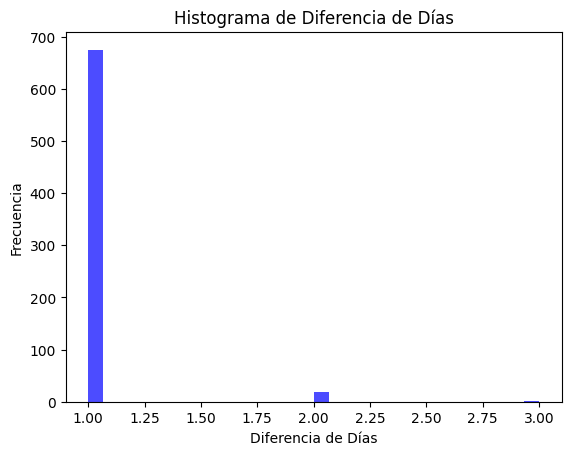

In [27]:
# Ejemplo de histograma para una columna
plt.hist(homicidios['N_VICTIMAS'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Diferencia de Días')
plt.xlabel('Diferencia de Días')
plt.ylabel('Frecuencia')
plt.show()

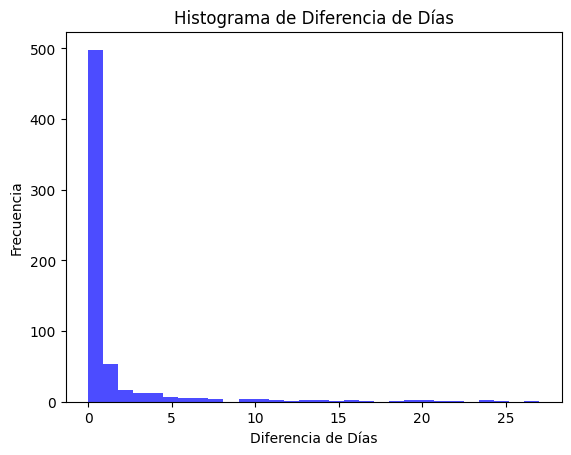

In [28]:
# Ejemplo de histograma para una columna
plt.hist(victimas['DIFERENCIA_DIAS'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Diferencia de Días')
plt.xlabel('Diferencia de Días')
plt.ylabel('Frecuencia')
plt.show()

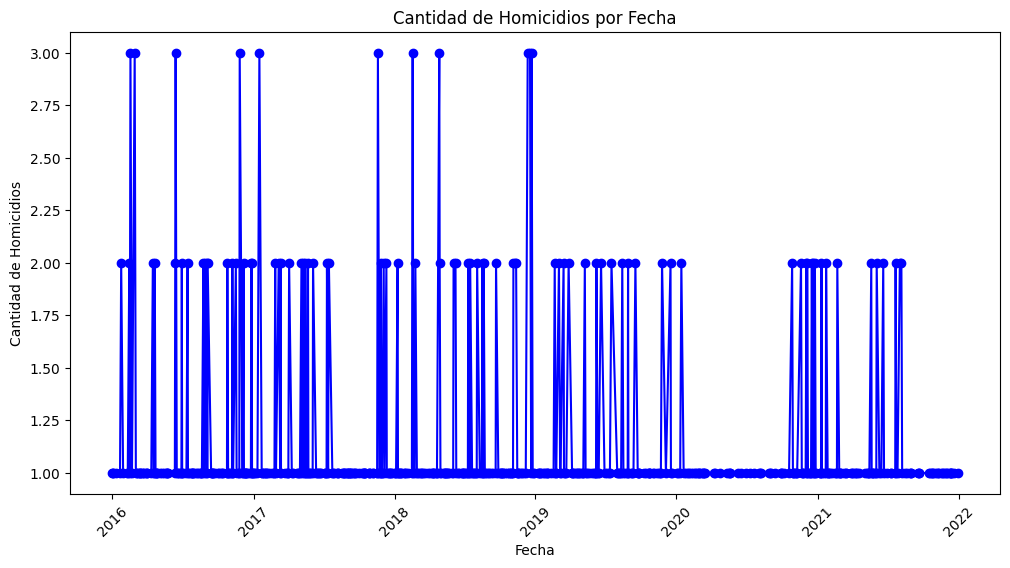

In [29]:

# Suponiendo que 'FECHA' es el nombre de la columna de fechas
homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'])  # Asegúrate de convertir la columna a tipo datetime

# Agrupa los datos por fecha y cuenta la cantidad de homicidios en cada fecha
conteo_por_fecha = homicidios['FECHA'].value_counts().sort_index()

# Crea el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.plot(conteo_por_fecha.index, conteo_por_fecha.values, marker='o', linestyle='-', color='b')
plt.title('Cantidad de Homicidios por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje x para mejor legibilidad
plt.show()


In [30]:
# Agrega una nueva columna 'ES_FIN_DE_SEMANA' que indica si la fecha es fin de semana (True/False)
homicidios['ES_FIN_DE_SEMANA'] = (homicidios['FECHA'].dt.weekday >= 5)

In [31]:
homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,ES_FIN_DE_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO,False
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS,True
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO,True
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD,True
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,7,MOTO-AUTO,MOTO,AUTO,False
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,MOTO-AUTO,MOTO,AUTO,False
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,11,MOTO-CARGAS,MOTO,CARGAS,False
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",9,AUTO-CARGAS,AUTO,CARGAS,False


In [32]:
resultados = homicidios.groupby('ES_FIN_DE_SEMANA')['N_VICTIMAS'].sum().reset_index()

# Verifica el resultado
print(resultados)


   ES_FIN_DE_SEMANA  N_VICTIMAS
0             False         504
1              True         212


No se ve tendencia de accidentes los findes de semanas

In [33]:
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIFERENCIA_DIAS
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11.0
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12,0.0
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5.0
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0.0
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3.0


In [34]:
# Suponiendo que 'SEXO' es la columna que contiene la información del sexo en tu DataFrame 'victimas'
resultados = victimas.groupby('SEXO').size().reset_index(name='NUMERO_FALLECIDOS')

# Verifica el resultado
print(resultados)


        SEXO  NUMERO_FALLECIDOS
0   FEMENINO                166
1  MASCULINO                545
2         SD                  6


Se ve una mayor tendecia de fallecidos en tipo de SEXO: Masculino

In [35]:
# Suponiendo que 'SEXO' es la columna que contiene la información del sexo en tu DataFrame 'victimas'
resultados = victimas.groupby('ROL').size().reset_index(name='CANT_FALLECIDO')

# Verifica el resultado
print(resultados)

                    ROL  CANT_FALLECIDO
0              CICLISTA              29
1             CONDUCTOR             330
2  PASAJERO_ACOMPAÑANTE              80
3                PEATON             267
4                    SD              11


In [36]:
# Suponiendo que 'SEXO' es la columna que contiene la información del sexo en tu DataFrame 'victimas'
resultados = victimas.groupby('VICTIMA').size().reset_index(name='CANT_FALLECIDO')

# Verifica el resultado
print(resultados)

     VICTIMA  CANT_FALLECIDO
0       AUTO              94
1  BICICLETA              29
2     CARGAS               7
3       MOTO             303
4      MOVIL               3
5  PASAJEROS               5
6     PEATON             267
7         SD               9


In [37]:

filtro_conductor = victimas['ROL'] == 'CONDUCTOR'
resultados = victimas[filtro_conductor].groupby(['VICTIMA', 'ROL']).size().reset_index(name='CANTIDAD')

# Verifica el resultado
print(resultados)


  VICTIMA        ROL  CANTIDAD
0    AUTO  CONDUCTOR        65
1  CARGAS  CONDUCTOR         3
2    MOTO  CONDUCTOR       261
3   MOVIL  CONDUCTOR         1


En este analisis podemos ver una tendencia de fallecimientos de conductores tanto de motos como de vehiculos

In [38]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HH', 'TIPO_DE_CALLE',
       'Calle', 'Dirección Normalizada', 'COMUNA', 'PARTICIPANTES', 'VICTIMA',
       'ACUSADO', 'ES_FIN_DE_SEMANA'],
      dtype='object')

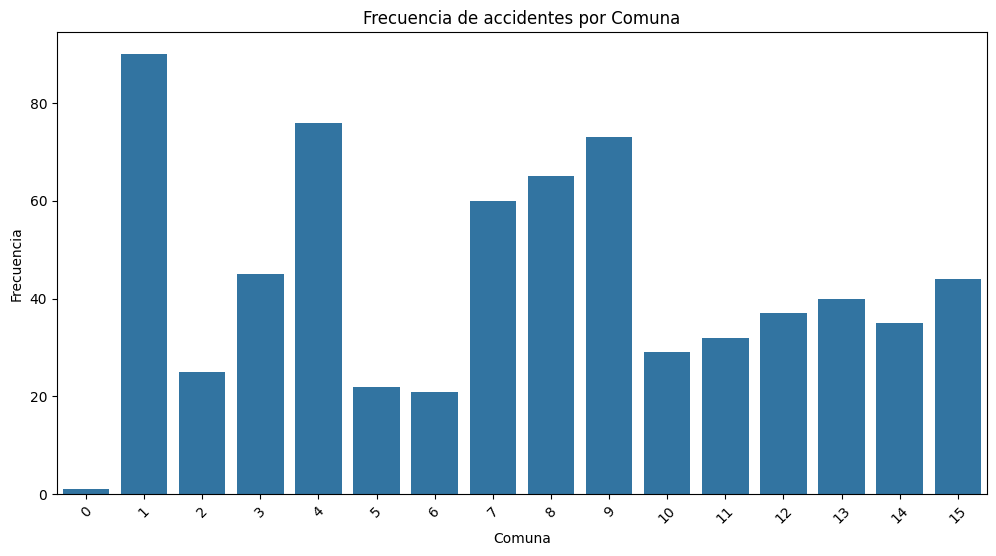

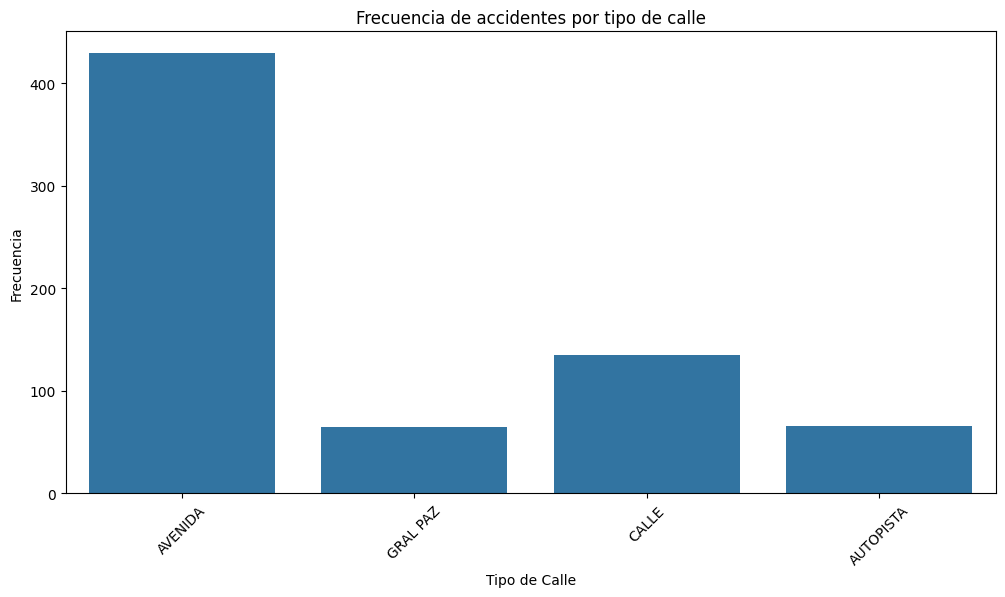

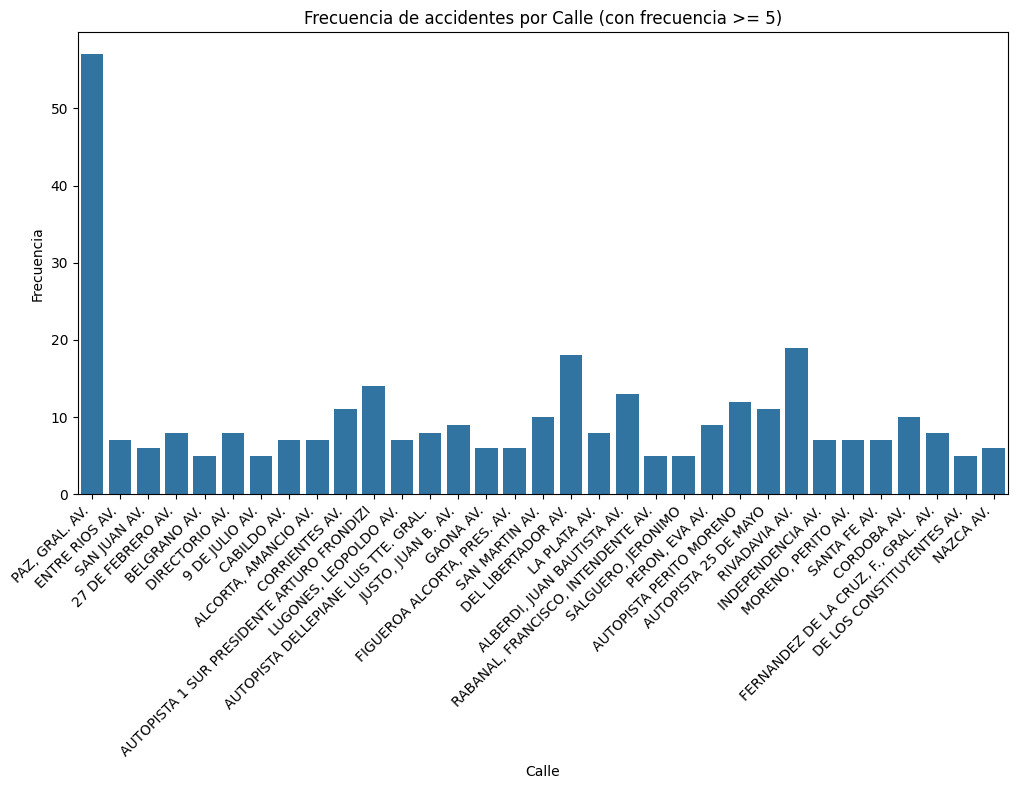

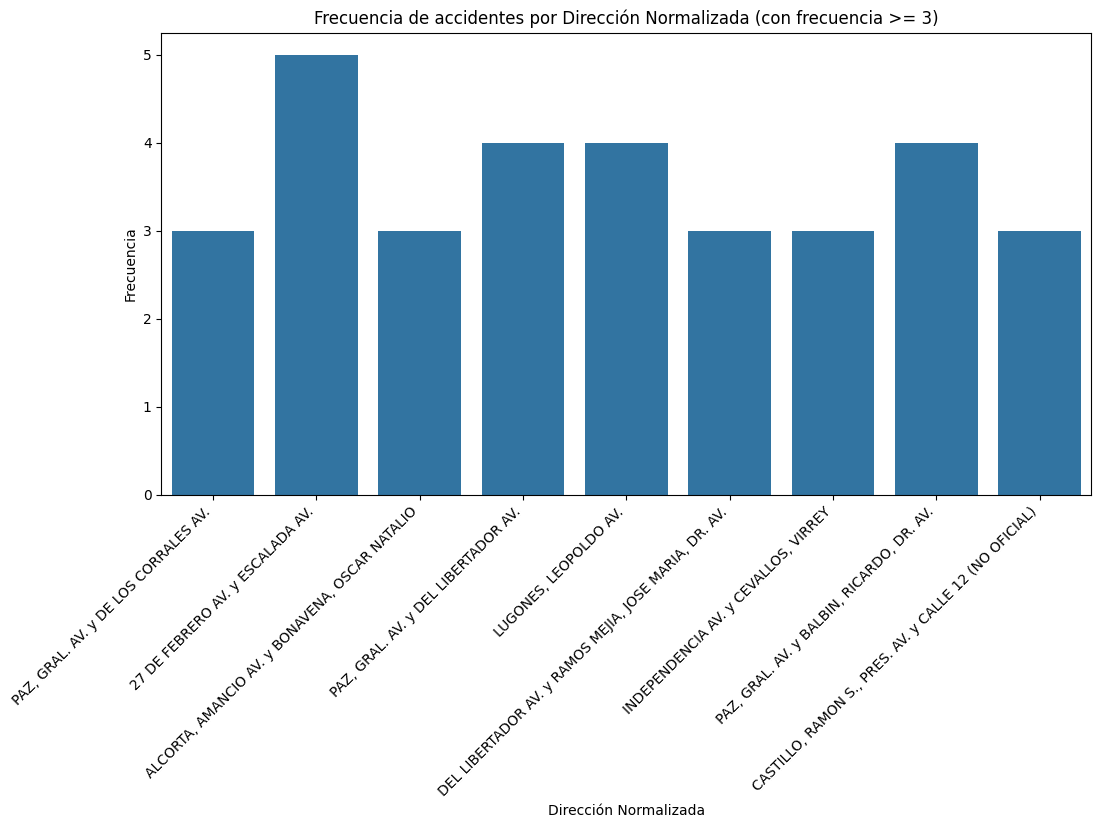

In [39]:
# Gráfico de barras para la frecuencia de la columna 'COMUNA'
plt.figure(figsize=(12, 6))
sns.countplot(x='COMUNA', data=homicidios)
plt.title('Frecuencia de accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para la frecuencia de la columna 'TIPO_DE_CALLE'
plt.figure(figsize=(12, 6))
sns.countplot(x='TIPO_DE_CALLE', data=homicidios)
plt.title('Frecuencia de accidentes por tipo de calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


# Filtrar datos para calles con frecuencia >= 5
calles_filtradas = homicidios['Calle'].value_counts()[homicidios['Calle'].value_counts() >= 5].index
homicidios_filtrados_calle = homicidios[homicidios['Calle'].isin(calles_filtradas)]

# Gráfico de barras para la frecuencia de la columna 'Calle' (calles con frecuencia >= 5)
plt.figure(figsize=(12, 6))
sns.countplot(x='Calle', data=homicidios_filtrados_calle)
plt.title('Frecuencia de accidentes por Calle (con frecuencia >= 5)')
plt.xlabel('Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

# Filtrar datos para direcciones normalizadas con frecuencia >= 3
direcciones_filtradas = homicidios['Dirección Normalizada'].value_counts()[homicidios['Dirección Normalizada'].value_counts() >= 3].index
homicidios_filtrados_direccion = homicidios[homicidios['Dirección Normalizada'].isin(direcciones_filtradas)]

# Gráfico de barras para la frecuencia de la columna 'Dirección Normalizada' (direcciones con frecuencia >= 3)
plt.figure(figsize=(12, 6))
sns.countplot(x='Dirección Normalizada', data=homicidios_filtrados_direccion)
plt.title('Frecuencia de accidentes por Dirección Normalizada (con frecuencia >= 3)')
plt.xlabel('Dirección Normalizada')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


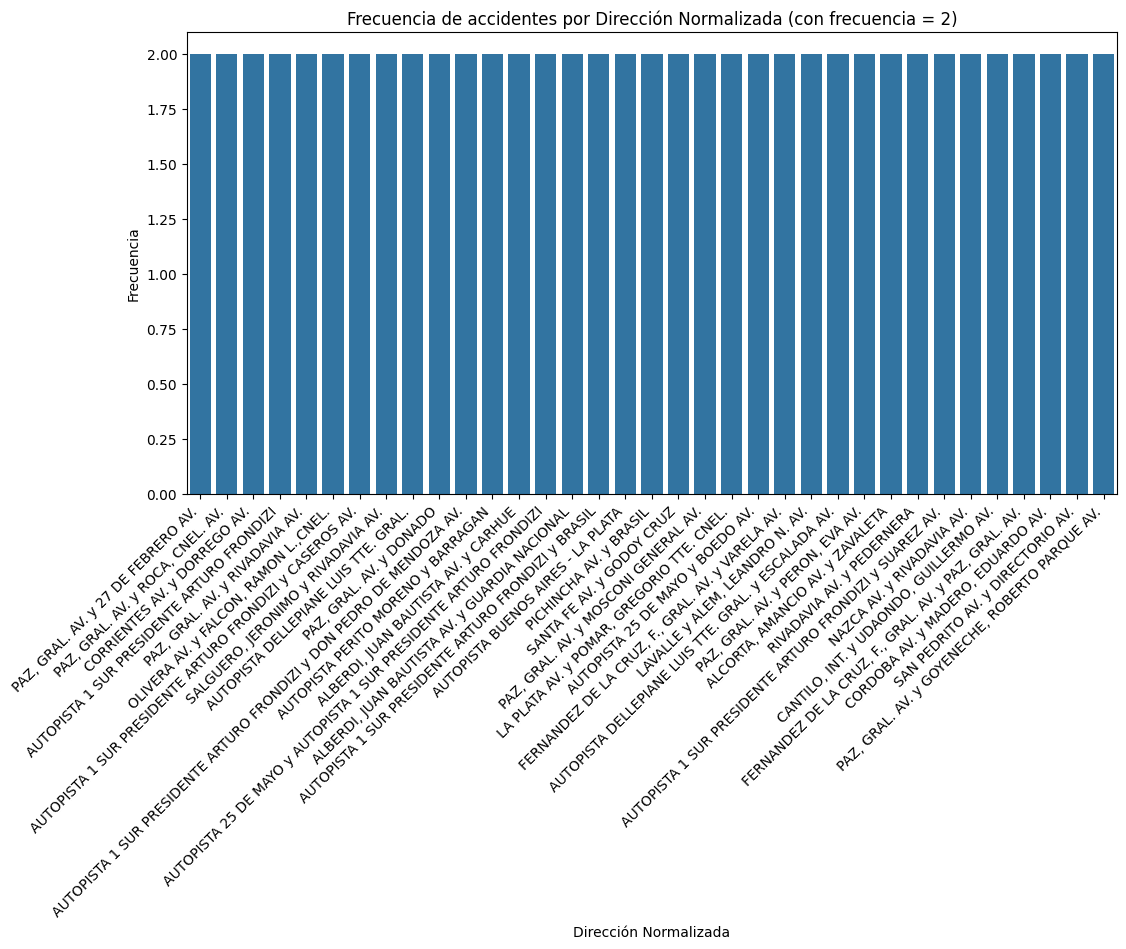

In [40]:
# Mostrar solo las calles donde hubo 2 accidentes

# Filtrar datos para direcciones normalizadas con frecuencia = 2
direcciones_filtradas = homicidios['Dirección Normalizada'].value_counts()[homicidios['Dirección Normalizada'].value_counts() == 2].index
homicidios_filtrados_direccion = homicidios[homicidios['Dirección Normalizada'].isin(direcciones_filtradas)]

# Gráfico de barras para la frecuencia de la columna 'Dirección Normalizada' (direcciones con frecuencia = 2)
plt.figure(figsize=(12, 6))
sns.countplot(x='Dirección Normalizada', data=homicidios_filtrados_direccion)
plt.title('Frecuencia de accidentes por Dirección Normalizada (con frecuencia = 2)')
plt.xlabel('Dirección Normalizada')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIFERENCIA_DIAS
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11.0
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12,0.0
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5.0
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0.0
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3.0


In [42]:
homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,ES_FIN_DE_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO,False
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS,True
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO,True
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD,True
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,7,MOTO-AUTO,MOTO,AUTO,False
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,MOTO-AUTO,MOTO,AUTO,False
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,11,MOTO-CARGAS,MOTO,CARGAS,False
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",9,AUTO-CARGAS,AUTO,CARGAS,False


In [43]:
# Uno los data frames para tener todo en uno
accidentes_y_victimas = pd.merge(homicidios, victimas, left_on='ID', right_on='ID_hecho', how='inner')

In [44]:
accidentes_y_victimas.head()

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,...,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO,DIFERENCIA_DIAS
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",...,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",...,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,...,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",...,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",...,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11.0


In [45]:
# Elimino columnas repetidas
accidentes_y_victimas = accidentes_y_victimas.drop(columns=['FECHA_y','AAAA_y','MM_y','DD_y'])

# Renombrar la columna 'ID_hechos' en df_victimas a 'ID'
accidentes_y_victimas = accidentes_y_victimas.rename(columns={'FECHA_x':'FECHA', 'AAAA_x':'Año', 'MM_x':'Mes','DD_x':'Dia'})


In [46]:
# Elimino columnas repetidas
accidentes_y_victimas = accidentes_y_victimas.drop(columns=['VICTIMA_x'])

# Renombrar la columna 'ID_hechos' en df_victimas a 'ID'
accidentes_y_victimas = accidentes_y_victimas.rename(columns={'VICTIMA_y':'VICTIMA', 'ROL':'ROL_VICTIMA'})

In [47]:
accidentes_y_victimas

,ID,N_VICTIMAS,FECHA,Año,Mes,Dia,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,...,PARTICIPANTES,ACUSADO,ES_FIN_DE_SEMANA,ID_hecho,ROL_VICTIMA,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIFERENCIA_DIAS
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",...,MOTO-AUTO,AUTO,False,2016-0001,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",...,AUTO-PASAJEROS,PASAJEROS,True,2016-0002,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,...,MOTO-AUTO,AUTO,True,2016-0003,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",...,MOTO-SD,SD,True,2016-0004,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",...,MOTO-PASAJEROS,PASAJEROS,False,2016-0005,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,...,MOTO-AUTO,AUTO,False,2021-0093,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5.0
712,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",...,MOTO-AUTO,AUTO,False,2021-0094,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0.0
713,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,...,MOTO-CARGAS,CARGAS,False,2021-0095,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3.0
714,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",...,AUTO-CARGAS,CARGAS,False,2021-0096,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20,5.0


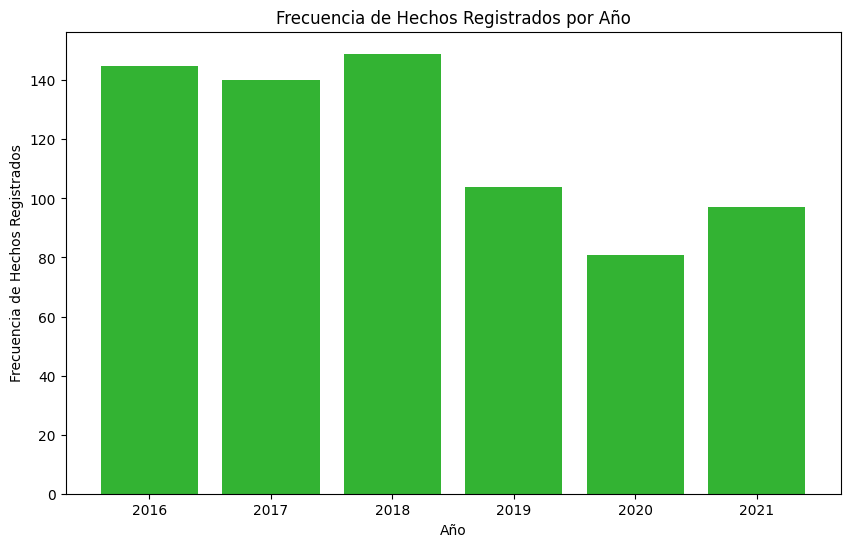

In [48]:
# Contar los hechos registrados por cada año
frecuencia_por_año = accidentes_y_victimas['Año'].value_counts().sort_index()

color_verde_suave = (0.2, 0.7, 0.2)

# Graficar las frecuencias por año
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_por_año.index, frecuencia_por_año.values, color=color_verde_suave)
plt.xlabel('Año')
plt.ylabel('Frecuencia de Hechos Registrados')
plt.title('Frecuencia de Hechos Registrados por Año')
plt.grid(False)
plt.show()

Ademas de la pandemia, se genero alguna medida para reducir los accidentes de trafico?

In [49]:
# Reemplazar 'SD' por -1 en la columna 'Edad'
accidentes_y_victimas['EDAD'] = accidentes_y_victimas['EDAD'].replace('SD', -1)

# Ver el DataFrame después del reemplazo
accidentes_y_victimas

,ID,N_VICTIMAS,FECHA,Año,Mes,Dia,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,...,PARTICIPANTES,ACUSADO,ES_FIN_DE_SEMANA,ID_hecho,ROL_VICTIMA,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIFERENCIA_DIAS
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",...,MOTO-AUTO,AUTO,False,2016-0001,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",...,AUTO-PASAJEROS,PASAJEROS,True,2016-0002,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,...,MOTO-AUTO,AUTO,True,2016-0003,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",...,MOTO-SD,SD,True,2016-0004,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",...,MOTO-PASAJEROS,PASAJEROS,False,2016-0005,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,...,MOTO-AUTO,AUTO,False,2021-0093,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5.0
712,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",...,MOTO-AUTO,AUTO,False,2021-0094,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0.0
713,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,...,MOTO-CARGAS,CARGAS,False,2021-0095,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3.0
714,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",...,AUTO-CARGAS,CARGAS,False,2021-0096,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20,5.0


----
---
---
Guardo los data sets en formato Excel

In [50]:
# Guardo los data frame en formato excel

# Le cambio el nombre a accidentes para mejor comprensión
# homicidios.to_excel('Data/accidentes.xlsx', index=False)
# victimas.to_excel('Data/victimas.xlsx', index=False)
# accidentes_y_victimas.to_excel('Data/accidentes_y_victimas.xlsx', index=False)

----
----
----

In [51]:
# Sumar las cantidades de víctimas por año
sum_victimas_por_año = accidentes_y_victimas.groupby('Año')['N_VICTIMAS'].sum().reset_index()

# Mostrar el resultado
print(sum_victimas_por_año)

    Año  N_VICTIMAS
0  2016         149
1  2017         160
2  2018         161
3  2019         106
4  2020          87
5  2021          97


En una nota leei que en 2007 era el año con mas muertes de 140!

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13912\3403009530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Año', y='N_VICTIMAS', data=sum_victimas_por_año, palette='viridis')


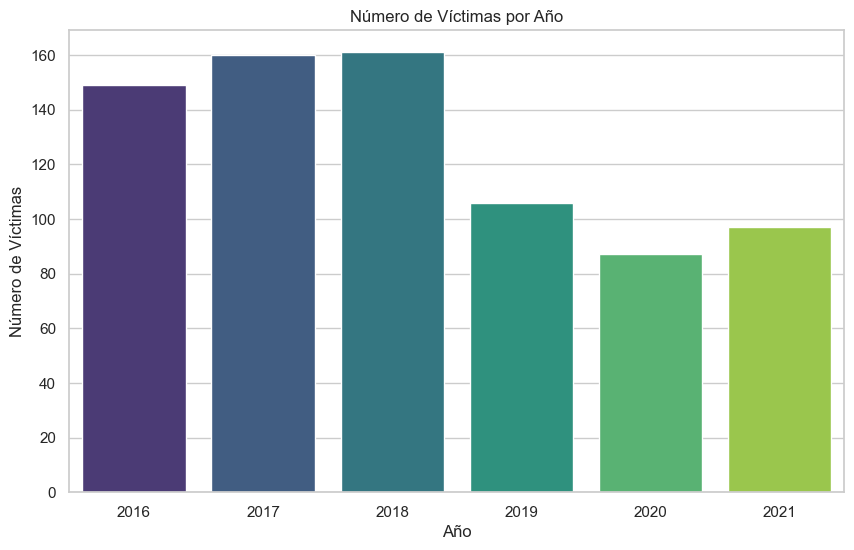

In [52]:
# Configurar el estilo de seaborn (opcional)
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Año', y='N_VICTIMAS', data=sum_victimas_por_año, palette='viridis')
bar_plot.set(xlabel='Año', ylabel='Número de Víctimas', title='Número de Víctimas por Año')

# Mostrar el gráfico
plt.show()

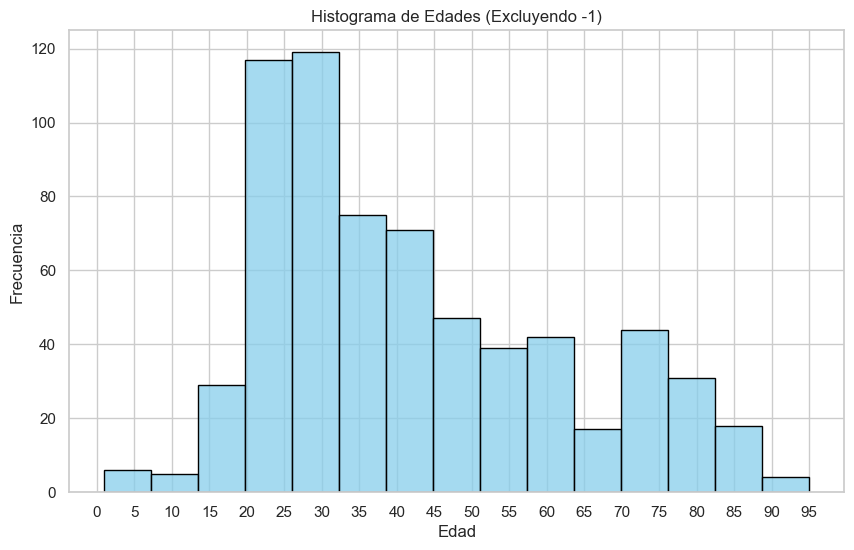

In [53]:
# Filtrar las edades excluyendo -1
edades_filtradas = accidentes_y_victimas['EDAD'][accidentes_y_victimas['EDAD'] != -1]

# Crear el histograma
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(edades_filtradas.dropna(), bins=15, kde=False, color='skyblue', edgecolor='black')
hist_plot.set(xlabel='Edad', ylabel='Frecuencia', title='Histograma de Edades (Excluyendo -1)')

# Establecer ticks en el eje X con una frecuencia de 5 en 5
plt.xticks(range(0, int(edades_filtradas.max()) + 5, 5))

# Mostrar el histograma
plt.show()

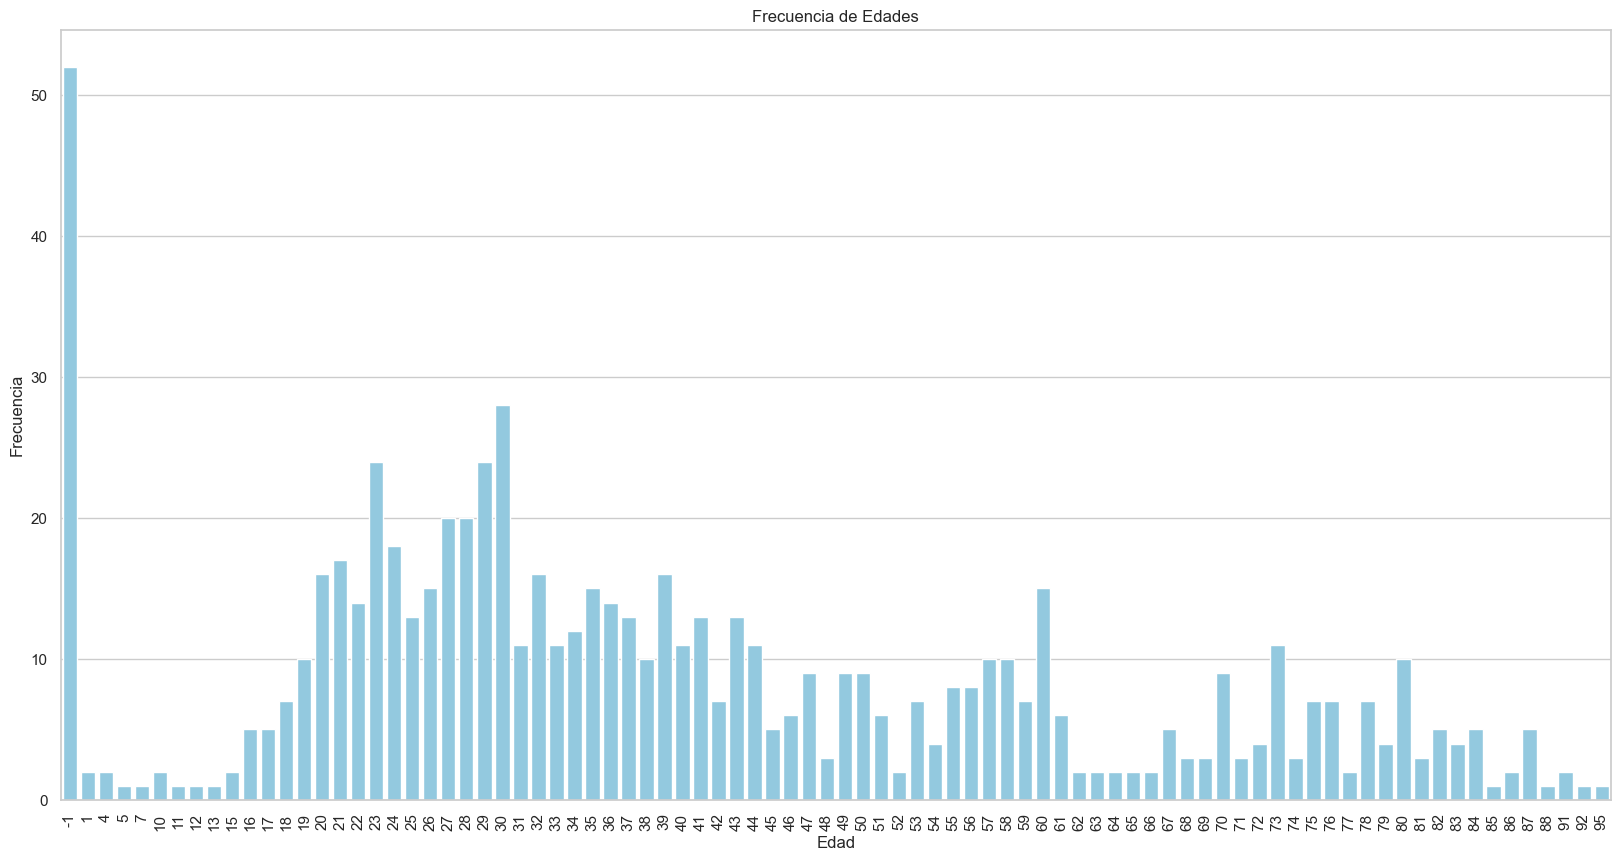

In [54]:
# Crear el gráfico de barras verticales
plt.figure(figsize=(20, 10))
bar_plot = sns.barplot(x=accidentes_y_victimas['EDAD'].value_counts().index, y=accidentes_y_victimas['EDAD'].value_counts(), color='skyblue')
bar_plot.set(xlabel='Edad', ylabel='Frecuencia', title='Frecuencia de Edades')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico de barras
plt.show()

---
----
# DATA DE INTERNET

En conjunto con la sociedad civil y el resto de las áreas del Gobierno de la Ciudad de Buenos Aires dedicadas a la seguridad vial, se elaboraron dos planes trianuales. Los resultados obtenidos durante el Primer Plan de Seguridad Vial permiten guiar los esfuerzos para alcanzar la meta de reducir en un 20% las víctimas fatales por siniestros viales para el 2023 y en un 50% para 2030, según el Segundo Plan de Seguridad Vial de la Ciudad.

https://buenosaires.gob.ar/movilidad/plan-de-seguridad-vial/observatorio-de-movilidad-y-seguridad-vial

----
----
----
# Carga del DATASET complementario

In [55]:
hechos_lesiones = pd.read_excel("Data sets entrada/lesiones.xlsx", 'HECHOS')
victimas_lesiones = pd.read_excel("Data sets entrada/lesiones.xlsx", 'VICTIMAS')

In [56]:
hechos_lesiones.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [57]:
col_hechos_lesiones = ['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'victima', 'acusado', 'participantes', 'gravedad']

hechos_lesiones = hechos_lesiones[col_hechos_lesiones]

In [58]:
hechos_lesiones

,id,n_victimas,aaaa,mm,dd,fecha,franja_hora,direccion_normalizada,comuna,tipo_calle,victima,acusado,participantes,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,9,SD,14,SD,CICLISTA,SD,CICLISTA-SD,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,1,SD,8,SD,AUTO,SD,AUTO-SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,2,SD,8,SD,SD,SD,SD-SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,2,SD,7,SD,PEATON,SD,PEATON-SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,4,SD,3,SD,AUTO,SD,AUTO-SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,AVENIDA,SD,SD,SD-SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,SD,SD-SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20,SD,1,SD,SD,SD,SD-SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22,LINIERS VIRREY y MORENO,5,CALLE,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,GRAVE


In [59]:
victimas_lesiones.columns

Index(['ID hecho', 'AAA', 'MM', 'DD', 'FECHA ', 'VEHICULO_VICTIMA', 'SEXO',
       'EDAD_VICTIMA', 'GRAVEDAD'],
      dtype='object')

In [60]:
victimas_lesiones

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


---

Ralizo agrupaciones para ver cantidades y tendencias

In [61]:
# Reemplazar 'grave' por 'GRAVE' en la columna 'gravedad'
hechos_lesiones['gravedad'] = hechos_lesiones['gravedad'].replace('grave', 'GRAVE')
hechos_lesiones['gravedad'] = hechos_lesiones['gravedad'].replace('sd', 'SD')

In [62]:
# Agrupar y contar los hechos según la columna 'gravedad'
conteo_gravedad = hechos_lesiones.groupby('gravedad').size().reset_index(name='conteo')

# Mostrar el resultado del conteo
print("\nConteo de hechos por gravedad:")
print(conteo_gravedad)


Conteo de hechos por gravedad:
  gravedad  conteo
0    FATAL       3
1    GRAVE     643
2       SD   23139


In [63]:
# Agrupar y contar los hechos según la columna 'gravedad'
conteo_victima = hechos_lesiones.groupby('victima').size().reset_index(name='conteo')

# Mostrar el resultado del conteo
print("\nConteo de hechos por victima:")
print(conteo_victima)


Conteo de hechos por victima:
               victima  conteo
0                 AUTO    2033
1               CAMION      79
2            CAMIONETA     189
3             CICLISTA    2209
4                MIXTO      42
5            MONOPATIN      28
6                 MOTO    5461
7                MOVIL     100
8                 OTRO      13
9               PEATON    2026
10                  SD   10733
11                TAXI     182
12  TRANSPORTE PUBLICO     678
13          UTILITARIO      12


In [64]:
# Agrupar y contar los hechos según la columna 'gravedad'
conteo_tipocalle = hechos_lesiones.groupby('tipo_calle').size().reset_index(name='conteo')

# Mostrar el resultado del conteo
print("\nConteo de hechos por tipo de calle:")
print(conteo_tipocalle)


Conteo de hechos por tipo de calle:
  tipo_calle  conteo
0  AUTOPISTA      44
1    AVENIDA    6775
2      CALLE    5383
3   GRAL PAZ     538
4         SD   11045


In [65]:
# Agrupar y contar los hechos según la columna 'gravedad'
conteo_participantes = hechos_lesiones.groupby('participantes').size().reset_index(name='conteo')

# Mostrar el resultado del conteo
print("\nConteo de hechos por participantes:")
print(conteo_participantes)


Conteo de hechos por participantes:
             participantes  conteo
0                AUTO-AUTO     566
1              AUTO-CAMION      59
2           AUTO-CAMIONETA     120
3            AUTO-CICLISTA       1
4                AUTO-MOTO      16
..                     ...     ...
123        UTILITARIO-AUTO       1
124      UTILITARIO-CAMION       1
125          UTILITARIO-SD       8
126        UTILITARIO-TAXI       1
127  UTILITARIO-UTILITARIO       1

[128 rows x 2 columns]


In [66]:
# Agrupar y contar los hechos según la columna 'gravedad'
conteo_acusado = hechos_lesiones.groupby('acusado').size().reset_index(name='conteo')

# Mostrar el resultado del conteo
print("\nConteo de hechos por acusado:")
print(conteo_acusado)



Conteo de hechos por acusado:
               acusado  conteo
0                 AUTO    4641
1               CAMION     288
2            CAMIONETA     872
3             CICLISTA      77
4            MONOPATIN       3
5                 MOTO     625
6                MOVIL      81
7          OBJETO FIJO     279
8                 OTRO      24
9               PEATON      13
10                  SD   15288
11                TAXI     591
12  TRANSPORTE PUBLICO     975
13          UTILITARIO      28


In [67]:
# Reemplazar 'grave' por 'GRAVE' en la columna 'gravedad'
victimas_lesiones['EDAD_VICTIMA'] = victimas_lesiones['EDAD_VICTIMA'].replace('sd', 'SD')

In [68]:
# Agrupar y contar los hechos según la columna 'gravedad'
conteo_edad_vict = victimas_lesiones.groupby('EDAD_VICTIMA').size().reset_index(name='conteo')

# Mostrar el resultado del conteo
print("\nConteo de hechos por edad:")
print(conteo_edad_vict)


Conteo de hechos por edad:
    EDAD_VICTIMA  conteo
0              0       2
1              1      20
2              2      17
3              3      28
4              4      25
..           ...     ...
185            9       5
186           90       3
187           91       3
188           94       1
189           SD    4471

[190 rows x 2 columns]


----
----

In [69]:
# Guardar los nuevos dataframe en fomato Excel
# hechos_lesiones.to_excel("Data/hechos_lesiones.xlsx", index=False)
# victimas_lesiones.to_excel("Data/victimas_lesiones.xlsx", index=False)

----
---

KPI 3 : Propuesto por mi

Reducir la cantidad de accidentes en Avenidas.

In [72]:
accidentes_y_victimas.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'Año', 'Mes', 'Dia', 'HH', 'TIPO_DE_CALLE',
       'Calle', 'Dirección Normalizada', 'COMUNA', 'PARTICIPANTES', 'ACUSADO',
       'ES_FIN_DE_SEMANA', 'ID_hecho', 'ROL_VICTIMA', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO', 'DIFERENCIA_DIAS'],
      dtype='object')

In [76]:
accidentes_y_victimas

,ID,N_VICTIMAS,FECHA,Año,Mes,Dia,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,...,PARTICIPANTES,ACUSADO,ES_FIN_DE_SEMANA,ID_hecho,ROL_VICTIMA,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIFERENCIA_DIAS
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",...,MOTO-AUTO,AUTO,False,2016-0001,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",...,AUTO-PASAJEROS,PASAJEROS,True,2016-0002,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,...,MOTO-AUTO,AUTO,True,2016-0003,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",...,MOTO-SD,SD,True,2016-0004,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",...,MOTO-PASAJEROS,PASAJEROS,False,2016-0005,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,...,MOTO-AUTO,AUTO,False,2021-0093,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5.0
712,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",...,MOTO-AUTO,AUTO,False,2021-0094,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0.0
713,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,...,MOTO-CARGAS,CARGAS,False,2021-0095,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3.0
714,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",...,AUTO-CARGAS,CARGAS,False,2021-0096,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20,5.0


In [77]:
# Filtrar por accidentes en Avenidas y ROL igual a PEATON
filtered_df = accidentes_y_victimas.loc[(accidentes_y_victimas['TIPO_DE_CALLE'] == 'AVENIDA') & (accidentes_y_victimas['ROL_VICTIMA'] == 'PEATON')]

# Sumar la cantidad de víctimas de la columna N_Victimas
total_victimas = filtered_df['N_VICTIMAS'].sum()

In [78]:
total_victimas

190